In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import timedelta

# Pandas setting

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
pd.reset_option("display.max_rows")

# Import the dataset

In [4]:
resort = pd.read_csv("./Raw dataset/resort.csv")

In [5]:
resort

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,CheckoutDate,Country,CustomerType,DaysInWaitingList,DepositType,LeadTime,MarketSegment,NumberOfAdult,NumberOfBabies,NumberOfChildren,RepeatedGuest,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent
0,2015-July-1,27,C,0.00,3,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,342,Direct,2,0,0,0,C,0,0,0,NULL
1,2015-July-1,27,C,0.00,4,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,737,Direct,2,0,0,0,C,0,0,0,NULL
2,2015-July-1,27,C,75.00,0,NULL,Direct,BB,0,2015-07-02,GBR,Transient,0,No Deposit,7,Direct,1,0,0,0,A,0,1,0,NULL
3,2015-July-1,27,A,75.00,0,NULL,Corporate,BB,0,2015-07-02,GBR,Transient,0,No Deposit,13,Corporate,1,0,0,0,A,0,1,0,304
4,2015-July-1,27,A,98.00,0,NULL,TA/TO,BB,0,2015-07-03,GBR,Transient,0,No Deposit,14,Online TA,2,0,0,0,A,0,2,1,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19808,2016-December-31,53,A,47.98,0,NULL,TA/TO,BB,0,2017-01-08,ESP,Transient,0,No Deposit,132,Online TA,2,0,0,0,A,2,6,2,240
19809,2016-December-29,53,A,47.54,0,NULL,TA/TO,BB,0,2017-01-09,IRL,Transient,0,No Deposit,154,Online TA,2,0,0,0,A,3,8,3,240
19810,2016-December-13,51,E,59.08,0,NULL,TA/TO,BB,0,2017-01-10,GBR,Transient,0,No Deposit,147,Online TA,2,0,0,0,E,8,20,1,NULL
19811,2016-December-29,53,A,80.14,0,NULL,TA/TO,Undefined,0,2017-01-12,FRA,Transient,0,No Deposit,68,Offline TA/TO,2,0,0,0,A,4,10,1,464


## Brief scanning through the dataset

In [6]:
resort.head()

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,CheckoutDate,Country,CustomerType,DaysInWaitingList,DepositType,LeadTime,MarketSegment,NumberOfAdult,NumberOfBabies,NumberOfChildren,RepeatedGuest,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent
0,2015-July-1,27,C,0.0,3,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,342,Direct,2,0,0,0,C,0,0,0,NULL
1,2015-July-1,27,C,0.0,4,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,737,Direct,2,0,0,0,C,0,0,0,NULL
2,2015-July-1,27,C,75.0,0,NULL,Direct,BB,0,2015-07-02,GBR,Transient,0,No Deposit,7,Direct,1,0,0,0,A,0,1,0,NULL
3,2015-July-1,27,A,75.0,0,NULL,Corporate,BB,0,2015-07-02,GBR,Transient,0,No Deposit,13,Corporate,1,0,0,0,A,0,1,0,304
4,2015-July-1,27,A,98.0,0,NULL,TA/TO,BB,0,2015-07-03,GBR,Transient,0,No Deposit,14,Online TA,2,0,0,0,A,0,2,1,240


In [7]:
resort.columns

Index(['ArrivalDate', 'ArrivalWeekNumber', 'AssignedRoom', 'AverageDailyRate',
       'BookingChanges', 'BookingCompany', 'BookingDistributionChannel',
       'BookingMeal', 'BookingParking', 'CheckoutDate', 'Country',
       'CustomerType', 'DaysInWaitingList', 'DepositType', 'LeadTime',
       'MarketSegment', 'NumberOfAdult', 'NumberOfBabies', 'NumberOfChildren',
       'RepeatedGuest', 'ReservedRoom', 'StaysInWeekendNights',
       'StaysInWeekNights', 'TotalOfSpecialRequests', 'TravelAgent'],
      dtype='object')

In [8]:
resort.describe()

,ArrivalWeekNumber,AverageDailyRate,BookingChanges,BookingParking,DaysInWaitingList,LeadTime,NumberOfAdult,NumberOfBabies,NumberOfChildren,RepeatedGuest,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests
count,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000,19813.000000
mean,31.284763,85.731259,0.325140,0.193055,0.845859,77.255893,1.836219,0.016000,0.097815,0.045879,1.115126,2.978146,0.613587
std,14.134241,55.269592,0.748558,0.396492,9.444273,92.910991,0.465308,0.127076,0.383542,0.209228,1.127864,2.400740,0.794681
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,48.000000,0.000000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,33.000000,68.570000,0.000000,0.000000,0.000000,37.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
75%,43.000000,110.000000,0.000000,0.000000,0.000000,125.000000,2.000000,0.000000,0.000000,0.000000,2.000000,5.000000,1.000000
max,53.000000,508.000000,17.000000,2.000000,150.000000,737.000000,4.000000,2.000000,3.000000,1.000000,19.000000,50.000000,5.000000


In [9]:
resort.dtypes

ArrivalDate                    object
ArrivalWeekNumber               int64
AssignedRoom                   object
AverageDailyRate              float64
BookingChanges                  int64
BookingCompany                 object
BookingDistributionChannel     object
BookingMeal                    object
BookingParking                  int64
CheckoutDate                   object
Country                        object
CustomerType                   object
DaysInWaitingList               int64
DepositType                    object
LeadTime                        int64
MarketSegment                  object
NumberOfAdult                   int64
NumberOfBabies                  int64
NumberOfChildren                int64
RepeatedGuest                   int64
ReservedRoom                   object
StaysInWeekendNights            int64
StaysInWeekNights               int64
TotalOfSpecialRequests          int64
TravelAgent                    object
dtype: object

In [10]:
len(resort)

19813

# Data Cleaning

### Data type transformation

In [11]:
resort["ArrivalDate"] = pd.to_datetime(resort['ArrivalDate'], format="%Y-%B-%d")
resort["CheckoutDate"] = pd.to_datetime(resort['CheckoutDate'], format="%Y-%m-%d")

### Clean the data with spared space

In [12]:
resort["TravelAgent"] = resort["TravelAgent"].apply(lambda x: x.strip())
resort["DepositType"] = resort["DepositType"].apply(lambda x: x.strip())
resort["BookingMeal"] = resort["BookingMeal"].apply(lambda x: x.strip())
resort["AssignedRoom"] = resort["AssignedRoom"].apply(lambda x: x.strip())
resort["BookingCompany"] = resort["BookingCompany"].apply(lambda x: x.strip())
resort["ReservedRoom"] = resort["ReservedRoom"].apply(lambda x: x.strip())

### Create arbitrary column

#### Total Night = StaysInWeekNights + StaysInWeekendNights

In [13]:
resort["TotalNight"] = resort["StaysInWeekNights"] + resort["StaysInWeekendNights"]

In [14]:
# Function to category the transaction into cross-weekday-weekend, weekday, weekend or the same day
def change_value(row):
    if row['StaysInWeekNights'] > 0 and row['StaysInWeekendNights'] > 0:
        return 'Cross'
    elif row['StaysInWeekNights'] > 0 and row['StaysInWeekendNights'] == 0:
        return 'Week'
    elif row['StaysInWeekNights'] == 0 and row['StaysInWeekendNights'] > 0:
        return 'Weekend'
    elif row['StaysInWeekNights'] == 0 and row['StaysInWeekendNights'] == 0:
        return 'SameDay'
    else:
        return None  # 或者根據需求回傳其他值

resort['WeekOrWeekendOrCross'] = resort.apply(change_value, axis=1)

resort

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,CheckoutDate,Country,CustomerType,DaysInWaitingList,DepositType,LeadTime,MarketSegment,NumberOfAdult,NumberOfBabies,NumberOfChildren,RepeatedGuest,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,TotalNight,WeekOrWeekendOrCross
0,2015-07-01,27,C,0.00,3,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,342,Direct,2,0,0,0,C,0,0,0,NULL,0,SameDay
1,2015-07-01,27,C,0.00,4,NULL,Direct,BB,0,2015-07-01,PRT,Transient,0,No Deposit,737,Direct,2,0,0,0,C,0,0,0,NULL,0,SameDay
2,2015-07-01,27,C,75.00,0,NULL,Direct,BB,0,2015-07-02,GBR,Transient,0,No Deposit,7,Direct,1,0,0,0,A,0,1,0,NULL,1,Week
3,2015-07-01,27,A,75.00,0,NULL,Corporate,BB,0,2015-07-02,GBR,Transient,0,No Deposit,13,Corporate,1,0,0,0,A,0,1,0,304,1,Week
4,2015-07-01,27,A,98.00,0,NULL,TA/TO,BB,0,2015-07-03,GBR,Transient,0,No Deposit,14,Online TA,2,0,0,0,A,0,2,1,240,2,Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19808,2016-12-31,53,A,47.98,0,NULL,TA/TO,BB,0,2017-01-08,ESP,Transient,0,No Deposit,132,Online TA,2,0,0,0,A,2,6,2,240,8,Cross
19809,2016-12-29,53,A,47.54,0,NULL,TA/TO,BB,0,2017-01-09,IRL,Transient,0,No Deposit,154,Online TA,2,0,0,0,A,3,8,3,240,11,Cross
19810,2016-12-13,51,E,59.08,0,NULL,TA/TO,BB,0,2017-01-10,GBR,Transient,0,No Deposit,147,Online TA,2,0,0,0,E,8,20,1,NULL,28,Cross
19811,2016-12-29,53,A,80.14,0,NULL,TA/TO,Undefined,0,2017-01-12,FRA,Transient,0,No Deposit,68,Offline TA/TO,2,0,0,0,A,4,10,1,464,14,Cross


In [15]:
weekendnight = len(resort[resort["WeekOrWeekendOrCross"]=="Weekend"])
weeknight = len(resort[resort["WeekOrWeekendOrCross"]=="Week"])
cross_weekend = len(resort[resort["WeekOrWeekendOrCross"]=="Cross"])
same = len(resort[resort["WeekOrWeekendOrCross"]=="SameDay"])
total = weekendnight + weeknight + cross_weekend + same
print(f"There are {round(weekendnight/total*100,2)}% lived only in weekend nights")
print(f"There are {round(weeknight/total*100,2)}% lived only in week nights")
print(f"There are {round(cross_weekend/total*100,2)}% lived croos week nights and wenkend nights")
print(f"There are {round(same/total*100,2)}% lived croos week nights and wenkend nights")

There are 6.44% lived only in weekend nights
There are 36.79% lived only in week nights
There are 55.19% lived croos week nights and wenkend nights
There are 1.58% lived croos week nights and wenkend nights


In [16]:
print(weekendnight)
print(weeknight)
print(cross_weekend)
print(same)

1276
7290
10934
313


#### Total People  = Adult + Children + Babies

In [17]:
resort["TotalPeople"] = resort["NumberOfAdult"] + resort["NumberOfChildren"] + resort["NumberOfBabies"]

#### Family or not

In [18]:
resort["IsFamily"] = np.where((resort["NumberOfChildren"] != 0) | (resort["NumberOfBabies"] != 0), 1, 0)

#### Revenue = Average Daily Rate * Total Night

In [19]:
resort["Revenue"] = resort["AverageDailyRate"] * resort["TotalNight"]

## Drop the data

### Drop the data that "ArrivalDate" is equal to "CheckoutDate"

In [20]:
len(resort[resort["TotalNight"] != (resort["CheckoutDate"]-resort["ArrivalDate"]).dt.days])

21

In [21]:
resort.drop(resort[resort["TotalNight"] != (resort["CheckoutDate"]-resort["ArrivalDate"]).dt.days].index, axis=0, inplace=True)

In [22]:
len(resort)

19792

### Drop the data with "TotalPeople" is 0

In [23]:
len(resort[resort["TotalPeople"] == 0])

5

In [24]:
resort.drop(resort[resort["TotalPeople"]==0].index, axis=0, inplace=True)

In [25]:
len(resort)

19787

In [26]:
resort.to_csv("resort_aftercleaning_new.csv", index = False)

# Exploratory Descriptive Analysis

### Customer Type

In [27]:
resort["CustomerType"].value_counts().index.to_list()

['Transient', 'Transient-Party', 'Contract', 'Group']

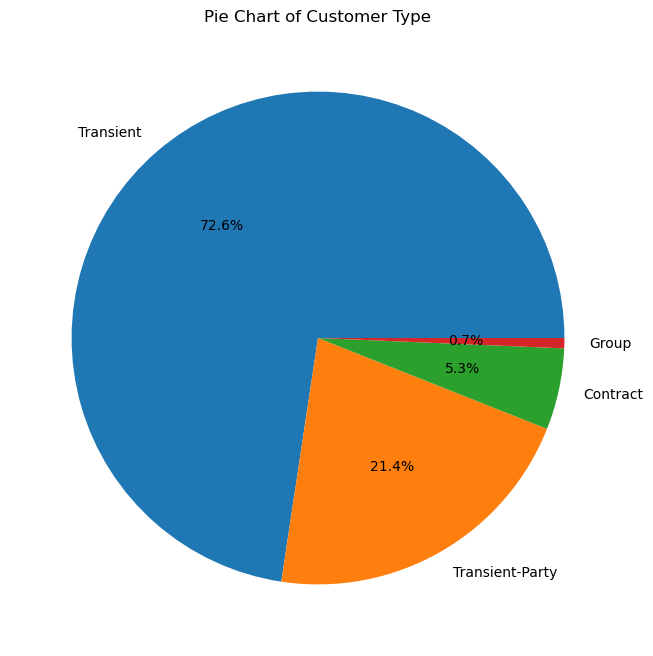

In [28]:
categories = resort["CustomerType"].value_counts().index.to_list()
values = resort["CustomerType"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Customer Type')
plt.show()

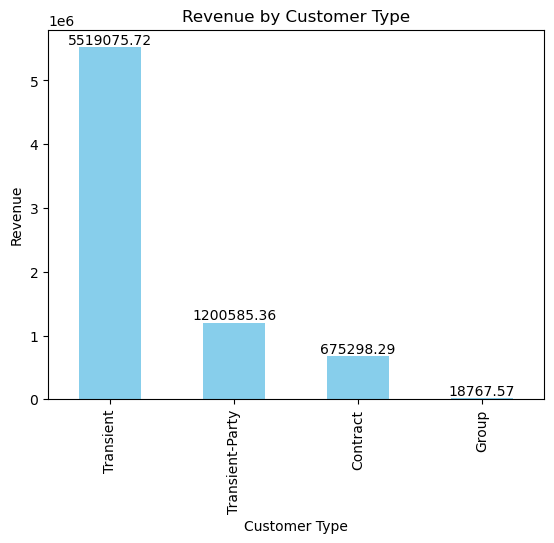

In [29]:
customertype_revenue = resort.groupby("CustomerType")["Revenue"].sum().sort_values(ascending=False)
customertype_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')

for index, value in enumerate(customertype_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

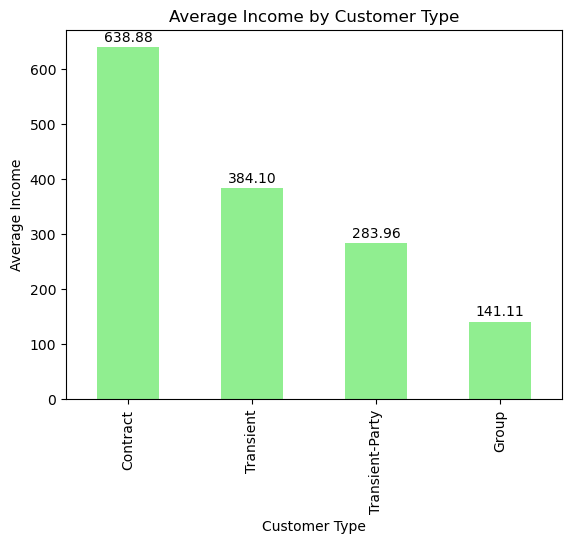

In [30]:
customertype_averagemean = resort.groupby("CustomerType")["Revenue"].mean().sort_values(ascending=False)
customertype_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Income')

for index, value in enumerate(customertype_averagemean):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Meal

In [31]:
resort["BookingMeal"].value_counts().index.to_list()

['BB', 'HB', 'Undefined', 'FB', 'SC']

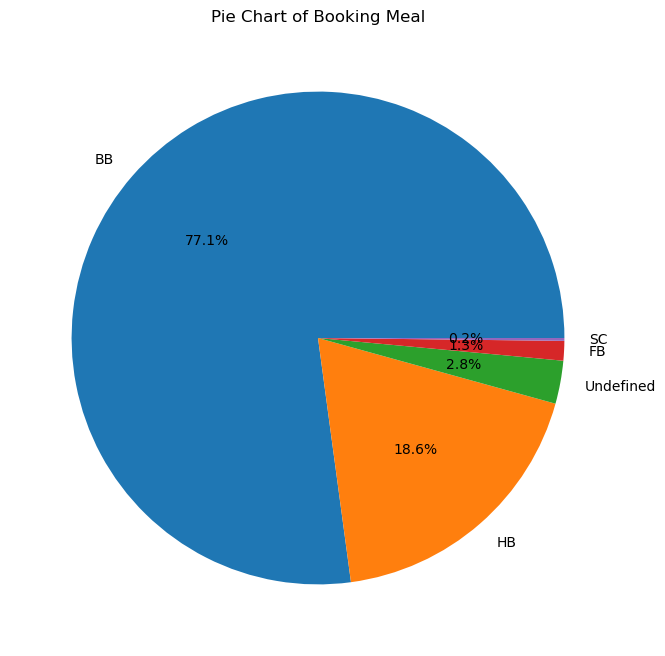

In [32]:
categories = resort["BookingMeal"].value_counts().index.to_list()
values = resort["BookingMeal"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Meal')
plt.show()

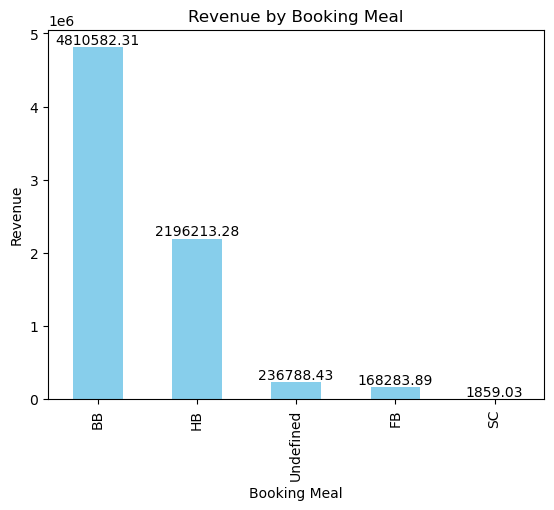

In [33]:
bookingmeal_revenue = resort.groupby("BookingMeal")["Revenue"].sum().sort_values(ascending=False)
bookingmeal_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Meal')
plt.xlabel('Booking Meal')
plt.ylabel('Revenue')

for index, value in enumerate(bookingmeal_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

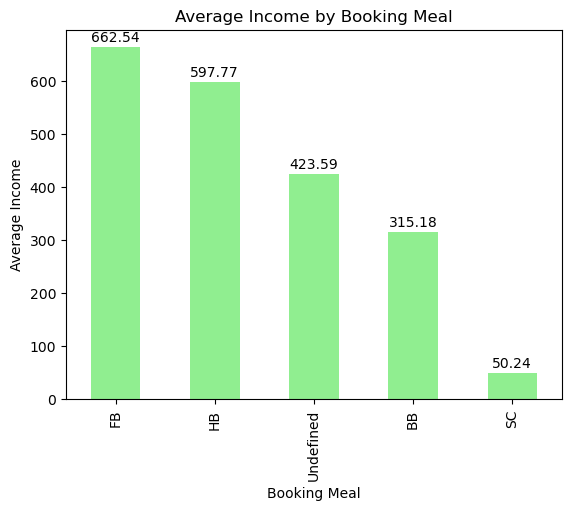

In [34]:
bookingmeal_averagemean = resort.groupby("BookingMeal")["Revenue"].mean().sort_values(ascending=False)
bookingmeal_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Booking Meal')
plt.xlabel('Booking Meal')
plt.ylabel('Average Income')

for index, value in enumerate(bookingmeal_averagemean):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Assigned Room

In [35]:
resort["AssignedRoom"].value_counts().sort_index()

AssignedRoom
A    7467
B      98
C    1208
D    5698
E    2883
F    1046
G     827
H     315
I     245
Name: count, dtype: int64

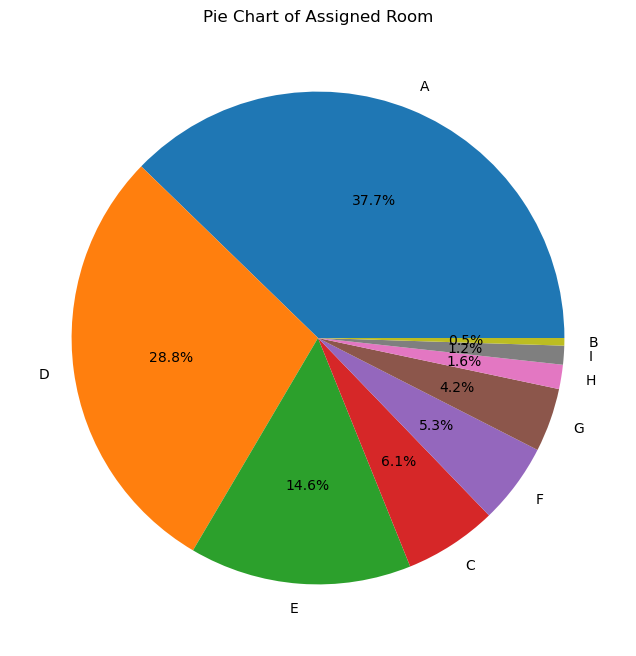

In [36]:
categories = resort["AssignedRoom"].value_counts().index.to_list()
values = resort["AssignedRoom"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Assigned Room')
plt.show()

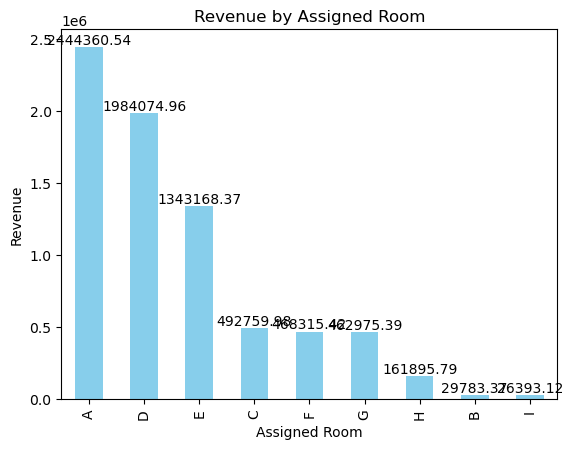

In [37]:
assigendroom_revenue = resort.groupby("AssignedRoom")["Revenue"].sum().sort_values(ascending=False)
assigendroom_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Assigned Room')
plt.xlabel('Assigned Room')
plt.ylabel('Revenue')

for index, value in enumerate(assigendroom_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

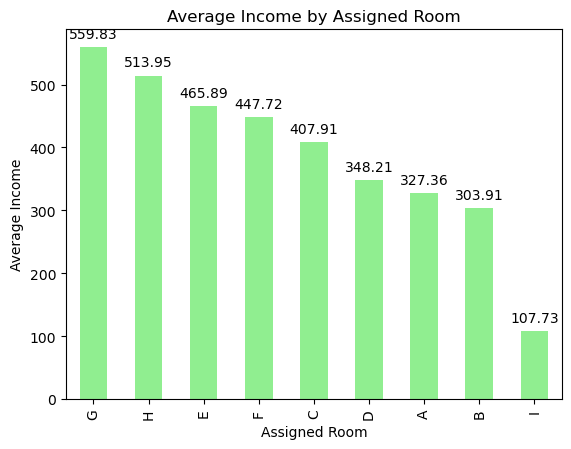

In [38]:
assignedroom_averagemean = resort.groupby("AssignedRoom")["Revenue"].mean().sort_values(ascending=False)
assignedroom_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Assigned Room')
plt.xlabel('Assigned Room')
plt.ylabel('Average Income')

for index, value in enumerate(assignedroom_averagemean):
    plt.text(index, value + 10, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Company

In [39]:
resort["BookingCompany"].value_counts().sort_values(ascending=False)

BookingCompany
NULL    17989
223       450
281       114
154        90
405        60
        ...  
422         1
435         1
439         1
485         1
32          1
Name: count, Length: 183, dtype: int64

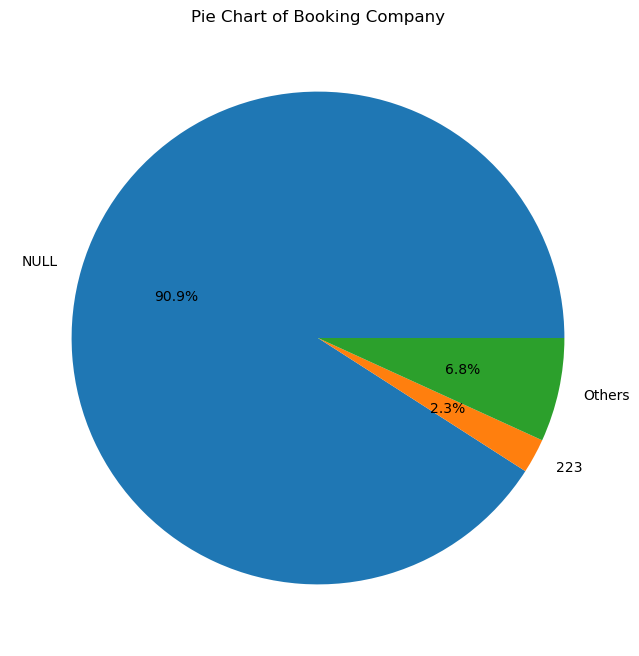

In [40]:
bookingcompany_sorted = resort["BookingCompany"].value_counts().sort_values(ascending=False)
top2_labels = bookingcompany_sorted[0:2].index
top2_size = bookingcompany_sorted[0:2].values

top2_labels_list = list(top2_labels)
top2_size_list = list(top2_size)
others_size = bookingcompany_sorted[2:].sum()

categories = []
categories.extend(top2_labels_list)
categories.append('Others')

values = []
values.extend(top2_size_list)
values.append(others_size)

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Company')
plt.show()

### Travel Agent

In [41]:
resort["TravelAgent"].value_counts().sort_values(ascending=False)

TravelAgent
240     5752
NULL    4711
250     1411
241      882
314      521
        ... 
303        1
434        1
358        1
304        1
469        1
Name: count, Length: 158, dtype: int64

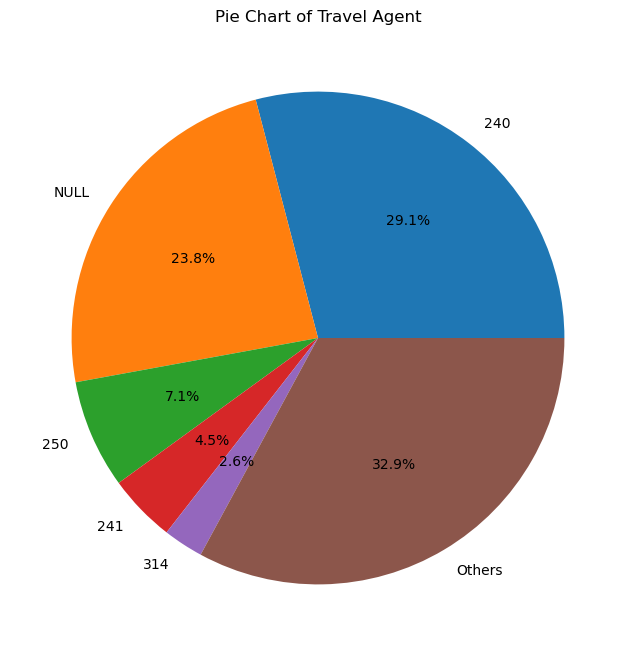

In [42]:
travelagent_sorted = resort["TravelAgent"].value_counts().sort_values(ascending=False)
top5_labels = travelagent_sorted[0:5].index
top5_size = travelagent_sorted[0:5].values

top5_labels_list = list(top5_labels)
top5_size_list = list(top5_size)
others_size = travelagent_sorted[5:].sum()

categories = []
categories.extend(top5_labels_list)
categories.append('Others')

values = []
values.extend(top5_size_list)
values.append(others_size)

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Travel Agent')
plt.show()

### Booking Distribution Channel

In [43]:
resort["BookingDistributionChannel"].value_counts()

BookingDistributionChannel
TA/TO        13432
Direct        4510
Corporate     1844
Undefined        1
Name: count, dtype: int64

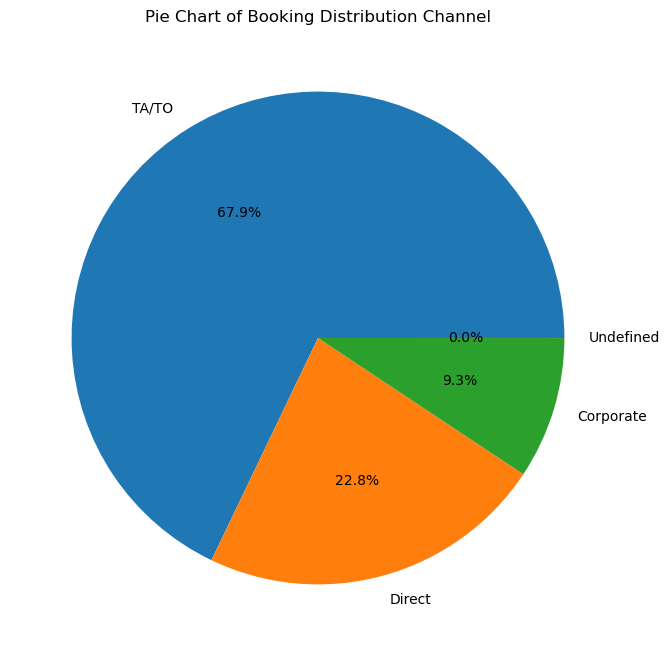

In [44]:
categories = resort["BookingDistributionChannel"].value_counts().index.to_list()
values = resort["BookingDistributionChannel"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Booking Distribution Channel')
plt.show()

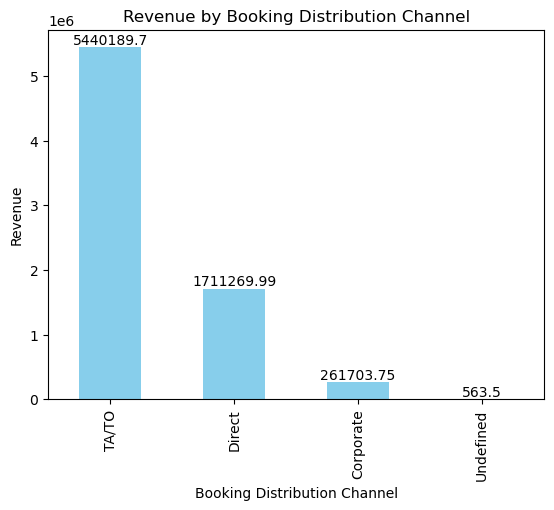

In [45]:
distributionchannel_revenue = resort.groupby("BookingDistributionChannel")["Revenue"].sum().sort_values(ascending=False)
distributionchannel_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Revenue')

for index, value in enumerate(distributionchannel_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

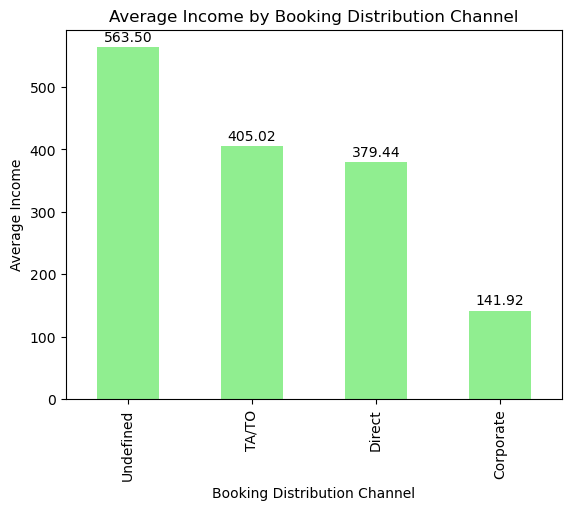

In [46]:
distributionchannel_averagemean = resort.groupby("BookingDistributionChannel")["Revenue"].mean().sort_values(ascending=False)
distributionchannel_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Booking Distribution Channel')
plt.xlabel('Booking Distribution Channel')
plt.ylabel('Average Income')

for index, value in enumerate(distributionchannel_averagemean):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### MarketSegment

In [47]:
resort["MarketSegment"].value_counts()

MarketSegment
Online TA        7500
Offline TA/TO    4721
Direct           3740
Groups           2372
Corporate        1337
Complementary     117
Name: count, dtype: int64

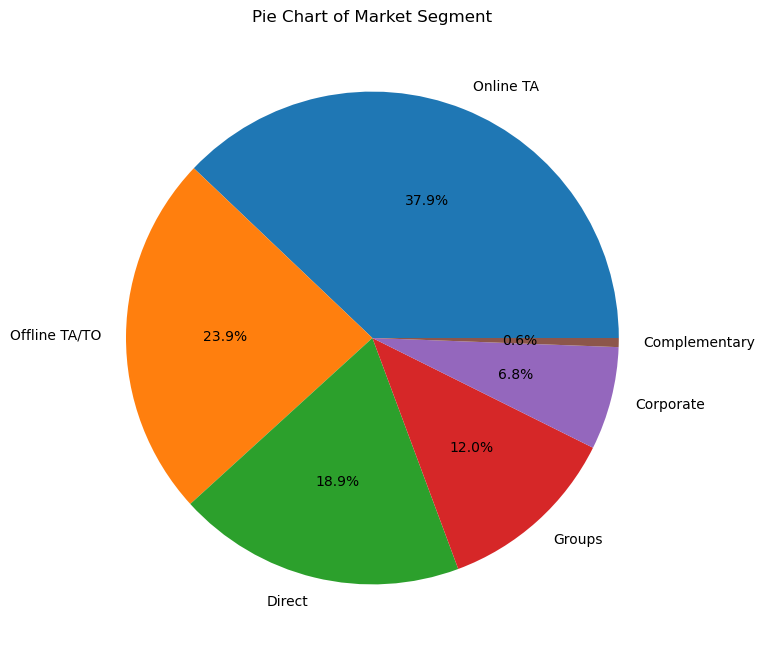

In [48]:
categories = resort["MarketSegment"].value_counts().index.to_list()
values = resort["MarketSegment"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Market Segment')
plt.show()

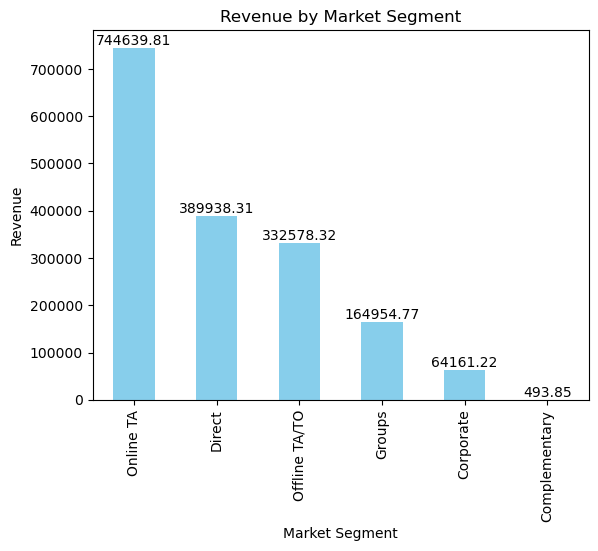

In [49]:
marketsegment_revenue = resort.groupby("MarketSegment")["AverageDailyRate"].sum().sort_values(ascending=False)
marketsegment_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Revenue')

for index, value in enumerate(marketsegment_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

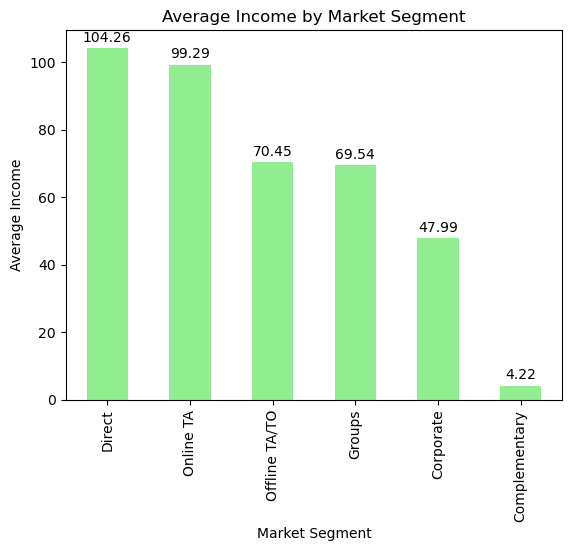

In [50]:
marketsegment_averagemean = resort.groupby("MarketSegment")["AverageDailyRate"].mean().sort_values(ascending=False)
marketsegment_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Income')

for index, value in enumerate(marketsegment_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Repeated Guest

In [51]:
resort["RepeatedGuest"].value_counts()

RepeatedGuest
0    18878
1      909
Name: count, dtype: int64

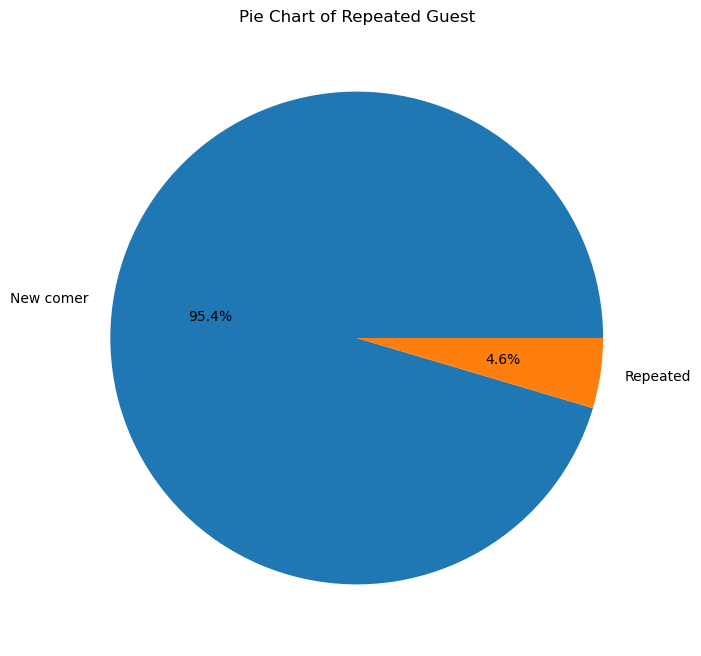

In [52]:
categories = ["New comer", "Repeated"]
values = resort["RepeatedGuest"].value_counts().to_list()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%')
# plt.axis('equal')
plt.title('Pie Chart of Repeated Guest')
plt.show()

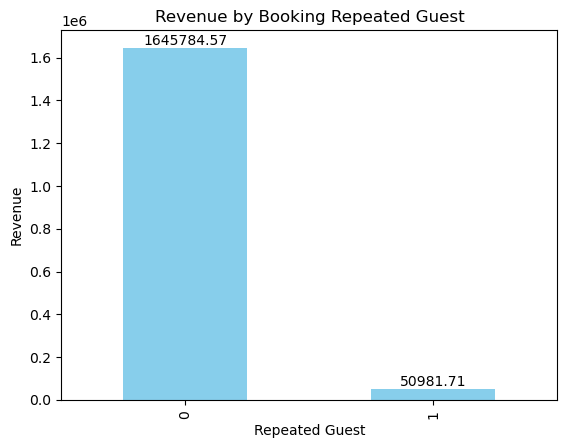

In [53]:
repeatedguest_revenue = resort.groupby("RepeatedGuest")["AverageDailyRate"].sum().sort_values(ascending=False)
repeatedguest_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Booking Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Revenue')

for index, value in enumerate(repeatedguest_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

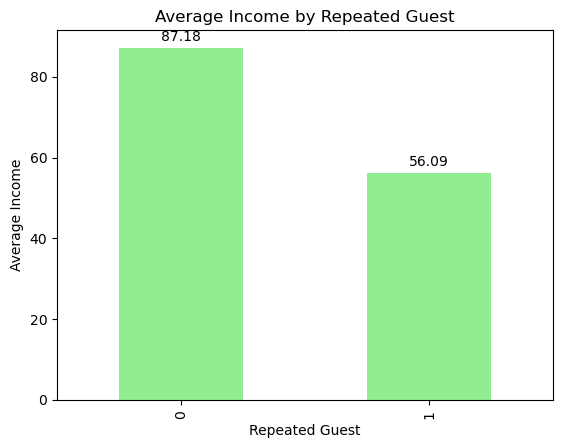

In [54]:
repeatedguest_averagemean = resort.groupby("RepeatedGuest")["AverageDailyRate"].mean().sort_values(ascending=False)
repeatedguest_averagemean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Average Income')

for index, value in enumerate(repeatedguest_averagemean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

### Booking Distribution Channel VS Repeated Guest

In [55]:
contingency_table = pd.crosstab(resort['BookingDistributionChannel'], resort['RepeatedGuest'])
contingency_table

RepeatedGuest,0,1
BookingDistributionChannel,,
Corporate,1517,327
Direct,4212,298
TA/TO,13148,284
Undefined,1,0


### Stays In Week Nights & Stays In Weekend Nights

In [56]:
weekendnight = len(resort[(resort["StaysInWeekNights"] == 0) & (resort["StaysInWeekendNights"] != 0)])
weeknight = len(resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] == 0)])
cross_weekend = len(resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] != 0)])
total = weekendnight + weeknight + cross_weekend
print(f"There are {round(weekendnight/total*100,2)}% lived only in weekend nights")
print(f"There are {round(weeknight/total*100,2)}% lived only in week nights")
print(f"There are {round(cross_weekend/total*100,2)}% lived croos week nights and wenkend nights")

There are 6.55% lived only in weekend nights
There are 37.42% lived only in week nights
There are 56.03% lived croos week nights and wenkend nights


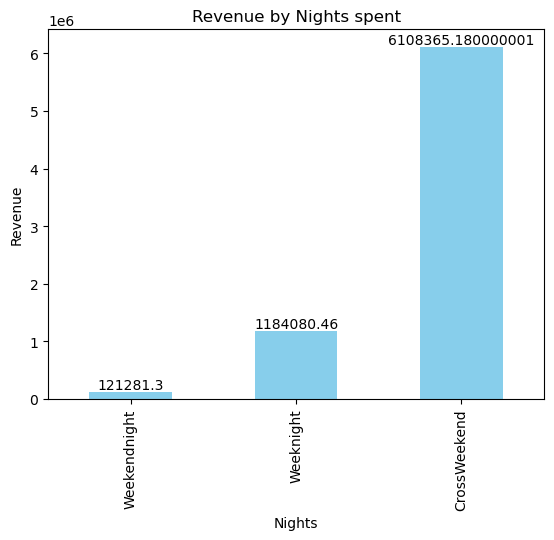

In [57]:
weekendnight_revenue = resort[(resort["StaysInWeekNights"] == 0) & (resort["StaysInWeekendNights"] != 0)]["Revenue"].sum()
weeknight_revenue = resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] == 0)]["Revenue"].sum()
crossweekend_revenue = resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] != 0)]["Revenue"].sum()
dic = {"Weekendnight": weekendnight_revenue, "Weeknight":weeknight_revenue, "CrossWeekend": crossweekend_revenue}
night_revenue = pd.Series(dic)
night_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Nights spent')
plt.xlabel('Nights')
plt.ylabel('Revenue')

for index, value in enumerate(night_revenue):
    plt.text(index, value + 50, str(value), ha='center', va='bottom')

plt.show()

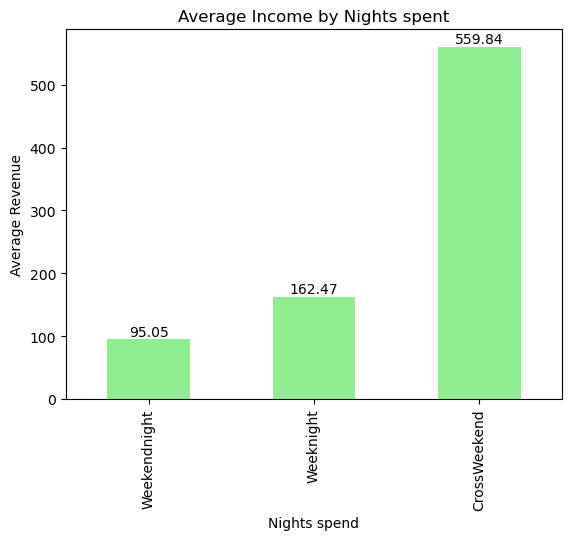

In [58]:
weekendnight_mean_revenue = resort[(resort["StaysInWeekNights"] == 0) & (resort["StaysInWeekendNights"] != 0)]["Revenue"].mean()
weeknight_mean_revenue = resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] == 0)]["Revenue"].mean()
crossweekend_mean_revenue = resort[(resort["StaysInWeekNights"] != 0) & (resort["StaysInWeekendNights"] != 0)]["Revenue"].mean()
dic = {"Weekendnight": weekendnight_mean_revenue, "Weeknight":weeknight_mean_revenue, "CrossWeekend": crossweekend_mean_revenue}
night_mean = pd.Series(dic)

night_mean.plot(kind='bar', color='lightgreen')
plt.title('Average Income by Nights spent')
plt.xlabel('Nights spend')
plt.ylabel('Average Revenue')

for index, value in enumerate(night_mean):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [59]:
younger = len(resort[(resort["NumberOfBabies"] != 0) | (resort["NumberOfChildren"] != 0)])
onlyadult = len(resort[(resort["NumberOfBabies"] == 0) | (resort["NumberOfChildren"] == 0)])
print(f"There are {onlyadult} data only adults")
print(f"There are {younger} data includes younger")

There are 19739 data only adults
There are 1632 data includes younger
